In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import MDS

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from pyclustering.cluster.kmedoids import kmedoids

In [11]:
data = pd.read_csv("dataframe.csv",  error_bad_lines=False)

In [13]:
data = data.drop(data.columns[0], axis=1)

In [14]:
data

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.126461,0.051321,0.150486,0.003713,-0.006865,-0.051347,0.026775,0.020915,0.092509,...,0.044981,0.047191,0.085395,-0.080926,0.040194,0.018831,0.280032,0.231613,0.202651,0.236750
1,0.126461,1.000000,0.164207,0.142304,0.167967,0.086927,0.105977,0.065570,0.088667,0.028294,...,0.212055,0.192137,0.141024,0.091720,-0.023254,-0.042421,0.137252,-0.007372,0.036162,0.142792
2,0.051321,0.164207,1.000000,0.229805,0.075309,0.358663,0.391382,-0.020584,0.437198,0.130811,...,0.086856,-0.018791,0.020394,0.274542,0.169849,0.051032,-0.011170,0.059398,0.084383,0.185923
3,0.150486,0.142304,0.229805,1.000000,0.230610,0.140906,0.210359,0.088985,0.254723,0.144566,...,0.143633,-0.049372,0.221609,-0.047475,0.170326,0.004311,0.195536,0.276024,0.112254,0.388479
4,0.003713,0.167967,0.075309,0.230610,1.000000,0.063740,0.050523,0.146866,0.014641,0.011390,...,0.207942,0.087460,0.061409,0.042439,0.053085,0.096214,0.051371,0.071286,-0.003435,0.171710
5,-0.006865,0.086927,0.358663,0.140906,0.063740,1.000000,0.475629,0.031458,0.350150,0.057676,...,-0.027787,0.044841,-0.010198,0.184605,0.069023,-0.055393,0.092985,-0.036765,0.052733,0.124888
6,-0.051347,0.105977,0.391382,0.210359,0.050523,0.475629,1.000000,0.129999,0.444315,0.021727,...,0.024433,-0.000144,-0.023317,0.075434,0.229533,0.100535,0.071655,0.041046,0.126489,0.139737
7,0.026775,0.065570,-0.020584,0.088985,0.146866,0.031458,0.129999,1.000000,-0.012408,0.007623,...,0.057801,0.039056,0.054240,-0.080023,0.198434,0.114288,0.132456,0.073644,0.148703,0.095818
8,0.020915,0.088667,0.437198,0.254723,0.014641,0.350150,0.444315,-0.012408,1.000000,0.201688,...,0.099913,-0.049870,-0.030418,0.116164,0.186047,0.026306,0.093711,0.075639,0.027291,0.241637
9,0.092509,0.028294,0.130811,0.144566,0.011390,0.057676,0.021727,0.007623,0.201688,1.000000,...,0.091121,-0.005521,0.057608,-0.028020,0.132202,0.089327,0.034894,0.142379,0.054077,0.216283


----

In [48]:
n_clusters = [i for i in range(30)]
n_clusters

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [17]:
data_arr = data.to_numpy()

In [49]:
kmedoids_instance = kmedoids(data_arr, n_clusters)
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

In [50]:
medoids_clust = []

for i in medoids:
    medoids_clust.append(labels[i][1])

medoids_clust

['family',
 'coworking',
 'ambiente',
 'cupid',
 'robots',
 'lebanon',
 'montana',
 'ice',
 'becker',
 'icon',
 'family',
 'supermarket',
 'barricade',
 'cat',
 'yogurt',
 'ceviche',
 'may',
 'hot',
 'banners',
 'cop',
 'target',
 'abstract',
 'cactus',
 'car',
 'antibiotic',
 'sensor',
 'professions',
 'po',
 'digital',
 'stunt']

In [32]:
labels = pd.read_csv("labels.csv",  error_bad_lines=False).to_numpy()

In [28]:
labels

array([[0, 'family'],
       [1, 'coworking'],
       [2, 'ciudad'],
       ...,
       [4997, 'website'],
       [4998, 'bathroom'],
       [4999, 'bathroom']], dtype=object)

In [51]:
cluster_labels = []


for i in range(len(clusters)):
    clust = []
    for j in clusters[i]:
        clust.append(str(labels[j][1]))
    cluster_labels.append(clust)
    
                     
    print("cluster #{}".format(i))
    print(clust)
        

cluster #0
['family', 'dad', 'caregiver', 'grandparents', 'home', 'home', 'home', 'bedroom', 'family', 'family', 'home', 'house', 'children', 'child', 'house', 'house', 'family', 'home', 'family', 'family']
cluster #1
['coworking', 'yoga', 'architecture', 'architecture', 'business', 'erotica', 'crossword', 'elegant', 'business', 'spa', 'art', 'journaling', 'art', 'museum', 'grunge', 'business', 'business', 'business', 'business', 'architecture', 'art', 'eco', 'business', 'spa', 'book', 'concept', 'business', 'business', 'business', 'art', 'steampunk', 'COFFEE']
cluster #2
['ambiente', 'ciudad', 'olla', 'plage', 'moda', 'cliente', 'banco', 'Fiesole', 'musica', 'familia', 'informatiques', 'carta', 'carta', 'flor', 'mujeres', 'camino', 'familia', 'regata', 'moda', 'militares', 'arte', 'francaise', 'construcción', 'arte', 'estudio', 'adresse', 'ambiente', 'palabra', 'modèle', 'verre', 'copa', 'fila', 'bomba', 'italiana', 'flor']
cluster #3
['cupid', 'adorable', 'elf', 'feather', 'groovy', 

In [ ]:
k

In [26]:
print(np.unique(cluster_labels[1]))

["[1 'coworking']" "[132 'erotica']" "[144 'crossword']" "[150 'music']"
 "[174 'app']" "[183 'exhibitor']" "[240 'business']" "[257 'desktop']"
 "[269 'online']" "[28 'digital']" "[282 'spa']" "[306 'journaling']"
 "[328 'app']" "[35 'freelancer']" "[353 'creative']" "[47 'yoga']"
 "[542 'app']" "[548 'museum']" "[55 'architecture']" "[612 'social']"
 "[614 'grunge']" "[620 'business']" "[621 'business']" "[622 'business']"
 "[623 'business']" "[634 'layout']" "[657 'architecture']" "[669 'eco']"
 "[681 'design']" "[687 'app']" "[70 'architecture']" "[725 'business']"
 "[733 'spa']" "[826 'concept']" "[838 'business']" "[839 'business']"
 "[843 'business']" "[871 'laptop']" "[91 'business']" "[931 'elearning']"
 "[932 'gaming']" "[937 'steampunk']" "[960 'academia']" "[97 'mobile']"
 "[981 'COFFEE']" "[985 'music']" "[990 'design']"]


----

In [43]:
from sklearn.manifold import MDS

emmbeded = MDS(n_components=2, dissimilarity='precomputed')
X_transformed = emmbeded.fit_transform(data_arr)


In [44]:
X_transformed

array([[-0.00474439, -0.05564245],
       [ 0.00207354,  0.064712  ],
       [ 0.04894322, -0.11141287],
       ...,
       [ 0.01230731,  0.00908368],
       [ 0.02191139, -0.03403683],
       [-0.10109692, -0.03197338]])

In [45]:
clusters_all = []

for i in clusters:
    for j in i:
        clusters_all.append(list(X_transformed[j]))

In [46]:
xx = []
yy = []
for i in range(len(clusters_all)):
    xx.append(clusters_all[i][0])
    yy.append(clusters_all[i][1])

In [47]:
color = ["y"]*len(clusters[0])+ ["r"]*len(clusters[1])+ ["b"]*len(clusters[2])+ ["orange"]*len(clusters[3])+ ["g"]*len(clusters[4])


In [60]:
labels = pd.read_csv("labels.csv",  error_bad_lines=False)

In [61]:
labels_ordered = np.array(labels[labels.columns[1]])
labels_ordered

array(['family', 'coworking', 'ciudad', ..., 'website', 'bathroom',
       'bathroom'], dtype=object)

In [65]:
labels = []
for i in labels_ordered:
    i = str(i)
    labels.append(i.lstrip("b'").strip("''")) 

In [66]:
labels

['family',
 'coworking',
 'ciudad',
 'adorable',
 'robots',
 'thailand',
 'montana',
 'ice',
 'ecker',
 'icon',
 'family',
 'supermarket',
 'arricade',
 'horse',
 'coffee',
 'olla',
 'connection',
 'hot',
 'flag',
 'cop',
 'active',
 'abstract',
 'vineyard',
 'auto',
 'vaccine',
 'sensor',
 'professions',
 'peru',
 'digital',
 'stunt',
 'artificial',
 'welcome',
 'canada',
 'infographic',
 'weight',
 'freelancer',
 'lack',
 'medic',
 'oat',
 'adult',
 'weight',
 'dubai',
 'people',
 'jersey',
 'tree',
 'table',
 'alcohol',
 'yoga',
 'character',
 'dog',
 'dealership',
 'flower',
 'chalkboard',
 'formula',
 'cornichon',
 'architecture',
 'falling',
 'rush',
 'dubai',
 'neon',
 'wisdom',
 'plage',
 'help',
 'abstract',
 'marriage',
 'fiji',
 'cinco',
 'tales',
 'vegan',
 'flyer',
 'architecture',
 'ackground',
 'attractive',
 'moda',
 'mercedes',
 'floor',
 'men',
 'arcelona',
 'fon',
 '4',
 'watercolor',
 'ulletin',
 'office',
 'led',
 'thinking',
 'cliente',
 'calculate',
 'Carousel',


IndexError: list index out of range

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21326 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 21326 missing from current font.
  font.set_text(s, 0, flags=flags)


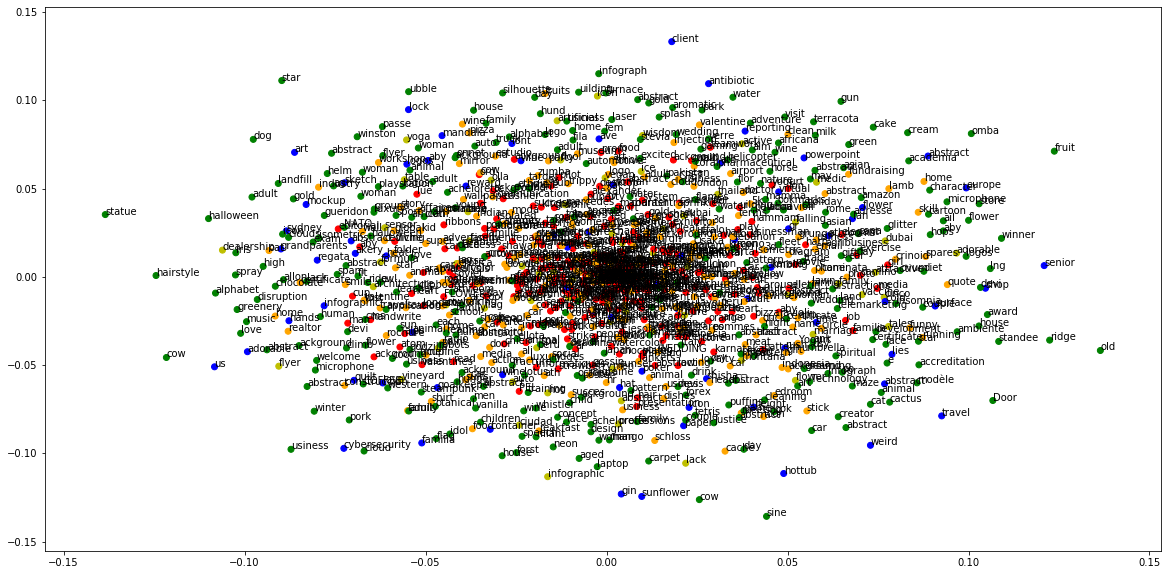

In [63]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(xx, yy, c=color)

for i, labels in enumerate(labels):
    ax.annotate(labels, (xx[i], yy[i]))
    
plt.show()